In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

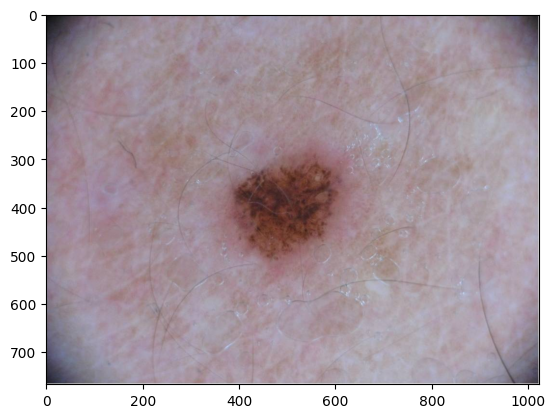

In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/ISIC_0000012.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.grid(False)

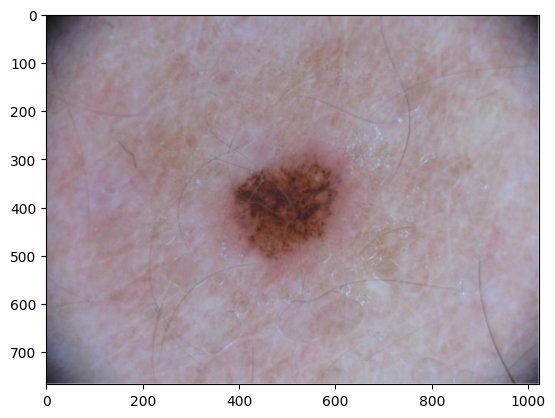

In [38]:
# Blurring image
copy_img=img.copy()

smoothed_image = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(smoothed_image)



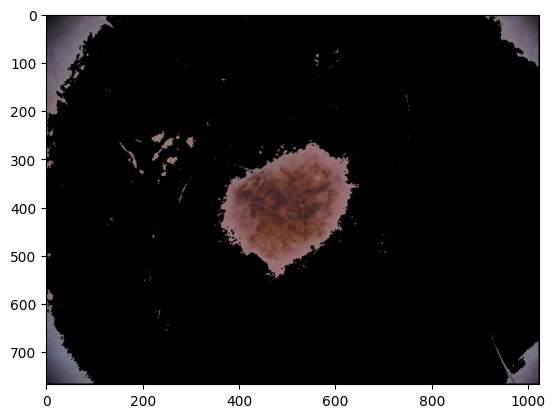

In [39]:
# Mask Creation
lower=np.array([120,120,120])
higher=np.array([255,255,255])
mask = cv2.inRange(img, lower,higher)
inverted_mask = cv2.bitwise_not(mask)
# Thresholding the disease area in image based on inverted mask
output = cv2.bitwise_and(img,img, mask=inverted_mask)
plt.imshow(output)

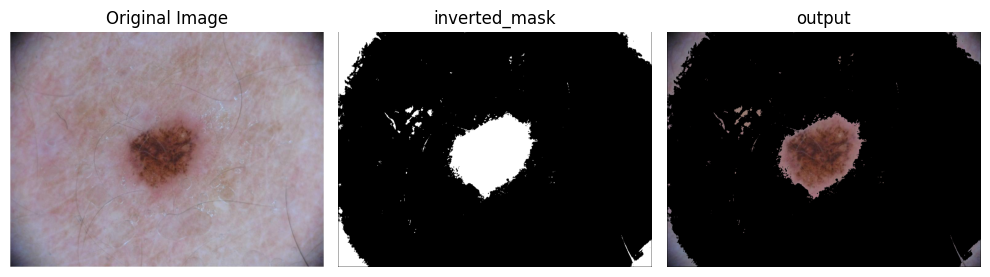

In [40]:
plt.figure(figsize=(10, 5))  # Set the figure size

# Show the original image
plt.subplot(1, 3, 1)  # 1 row, 2 columns, 1st position
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # Hide axes for better visualization

# Show the mask
plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd position
plt.imshow(inverted_mask, cmap='gray')
plt.title('inverted_mask')
plt.axis('off')

#show output
plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2nd position
plt.imshow(output, cmap='gray')
plt.title('output')
plt.axis('off')
plt.tight_layout()  
plt.show()

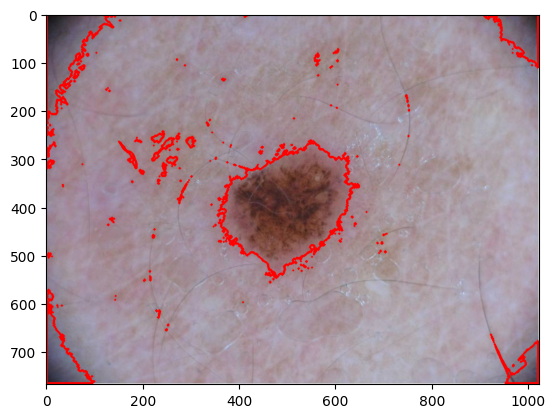

In [41]:
contours, _ = cv2.findContours(inverted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cont_img=cv2.drawContours(img, contours, -1, 255, 3)
plt.imshow(cont_img)

In [42]:
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Draw the bounding rectangle on the image
rect_img = img.copy()
cv2.rectangle(rect_img, (x, y), (x + w, y + h), (0, 255, 0), 2) 

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

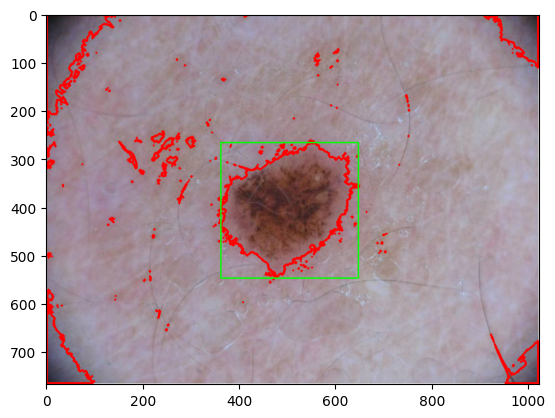

In [43]:
plt.imshow(rect_img)

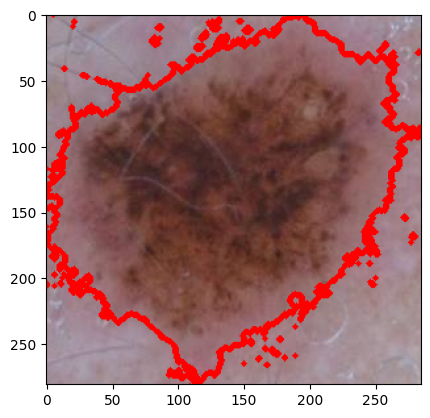

In [45]:
#Cropped image with countour
cropped_img = img[y:y + h, x:x + w]
plt.imshow(cropped_img)

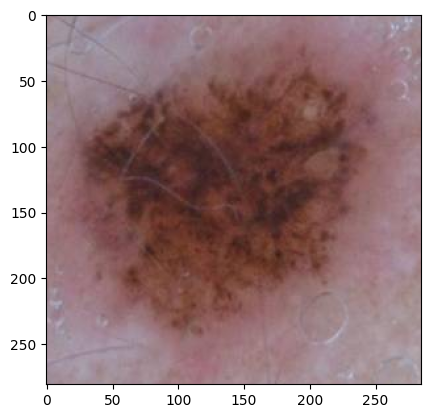

In [46]:
#Main image Cropping without showing countour
foreground = copy_img[y:y + h, x:x + w]
plt.imshow(foreground)